# SVM 다중 분류 - IRIS 데이터셋 / Wine 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## #02. IRIS 데이터 셋

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'], info=False)


상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | setosa    |
|  4 |              5 |           3.6 |            1.4 |           0.2 | setosa    |
+----+----------------+---------------+----------------+---------------+-----------+


### [2] 데이터 전처리

1. 종속변수 라벨링
3. 훈련/검증 데이터 분리 + 데이터 스케일링

In [3]:
df = my_labelling(origin, 'Species')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='Species', test_size=0.2, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

+------------+---------+
| Species    |   label |
|------------+---------|
| setosa     |       0 |
| versicolor |       1 |
| virginica  |       2 |
+------------+---------+


((120, 4), (30, 4), (120,), (30,))

### [3] SVM 분류 구현

[교차검증 TOP5]
+----+----------+-------------------+
|    | kernel   |   mean_test_score |
|----+----------+-------------------|
|  0 | rbf      |          0.941667 |
|  1 | sigmoid  |          0.916667 |
|  2 | poly     |          0.891667 |
+----+----------+-------------------+

[Best Params]
{'kernel': 'rbf'}

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.958333 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |      0.95818 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.958333 |            1 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |     0.958621 |            1 | 정밀도와 재현율의 조화평균      

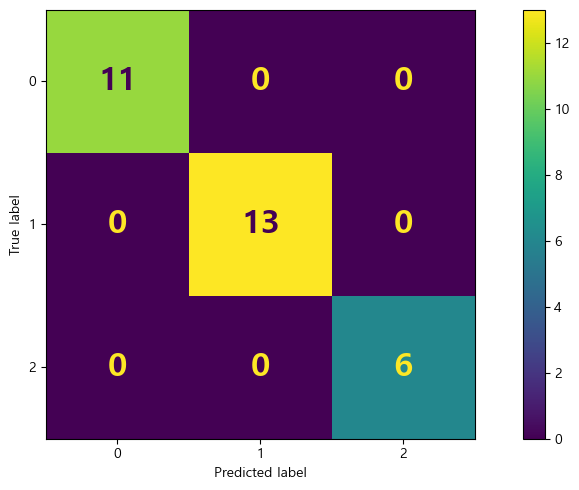


[Roc Curve]


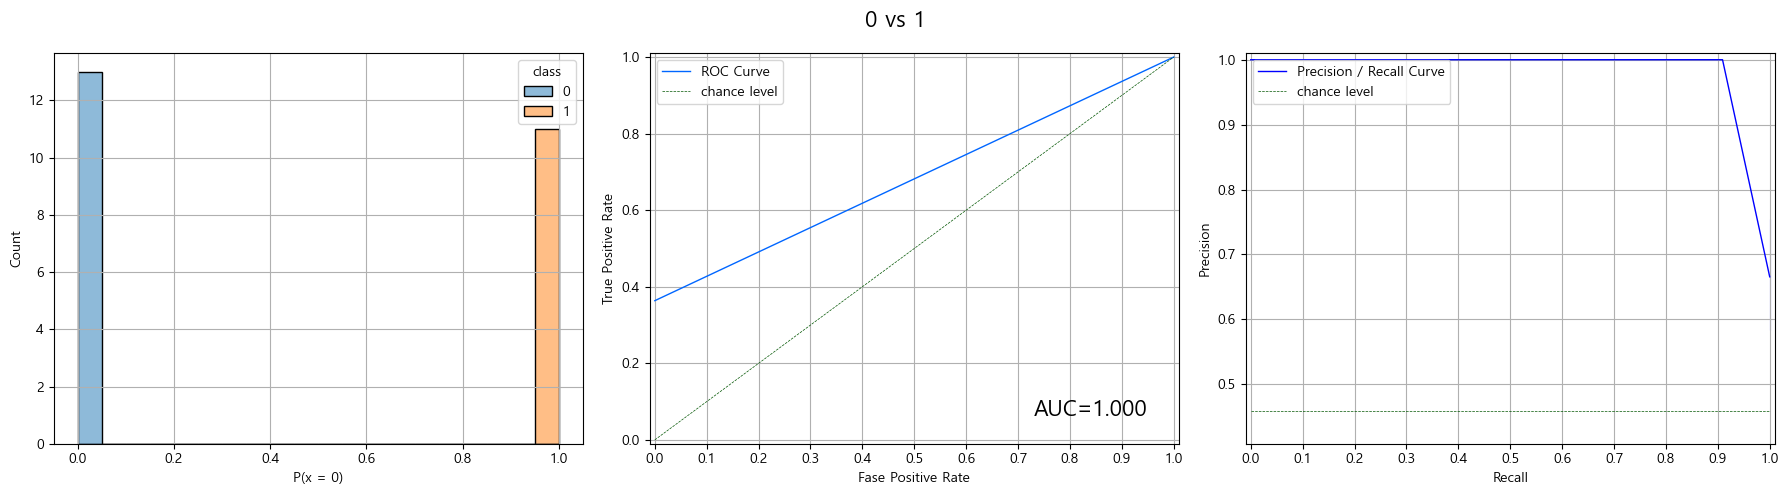

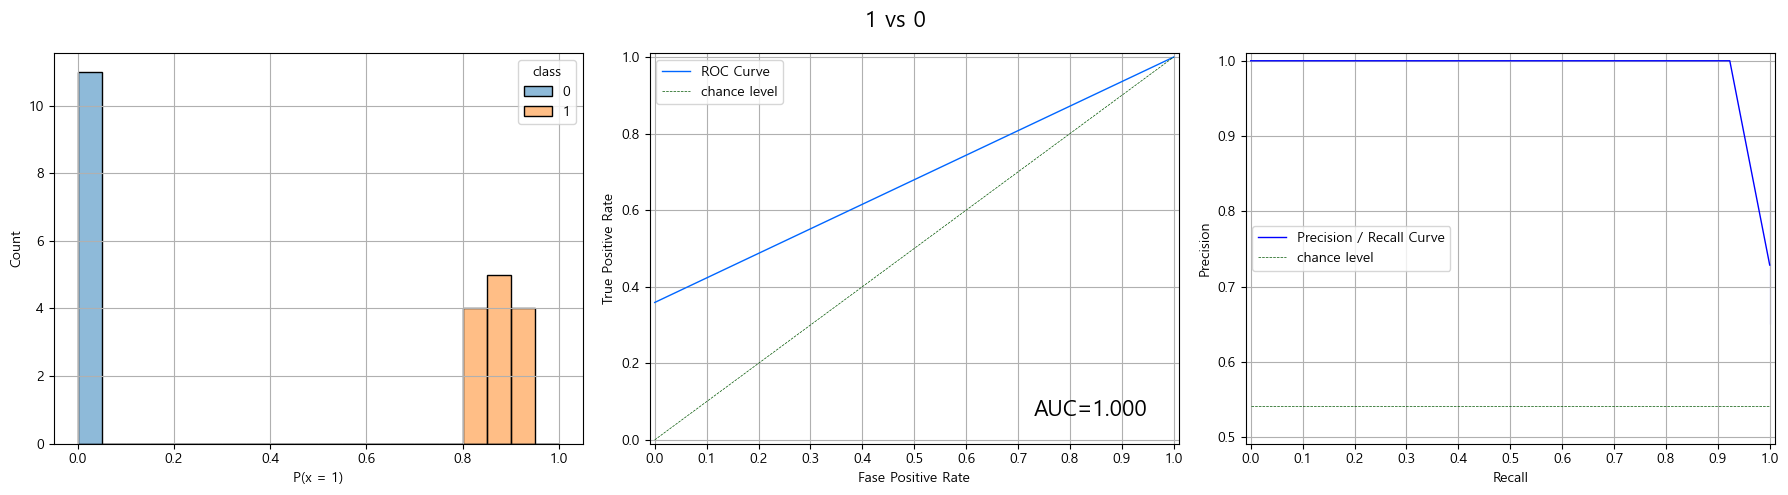

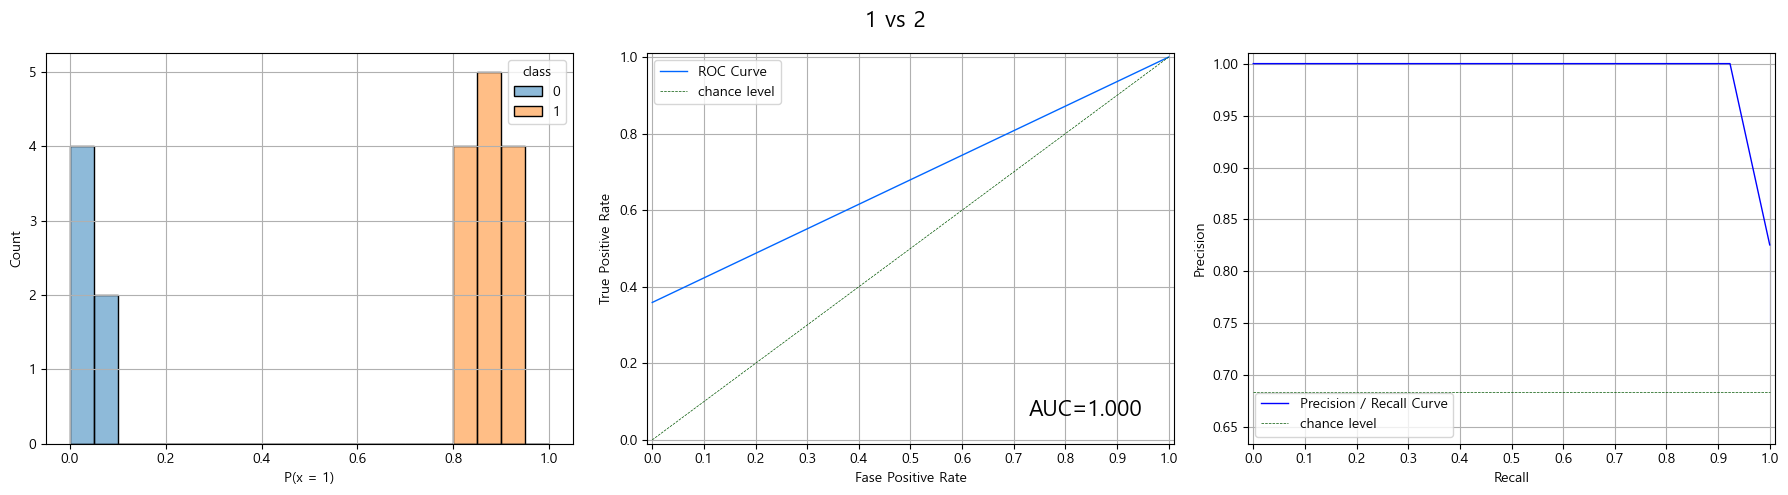

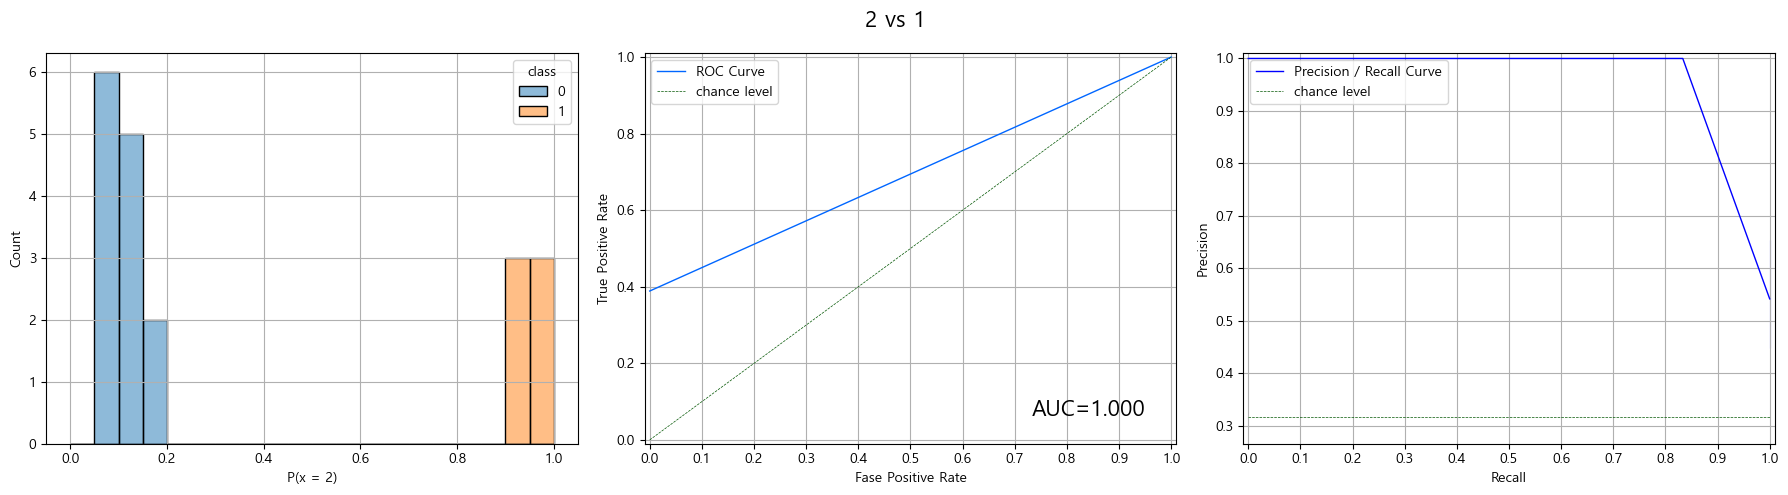

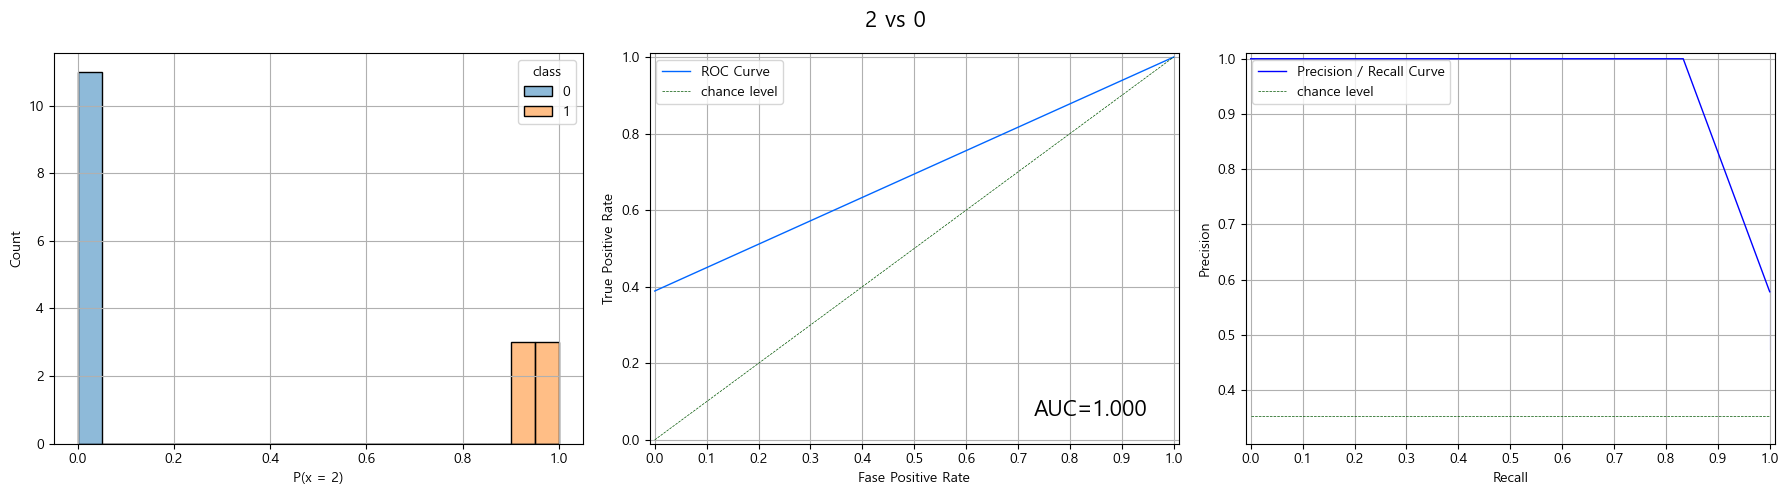

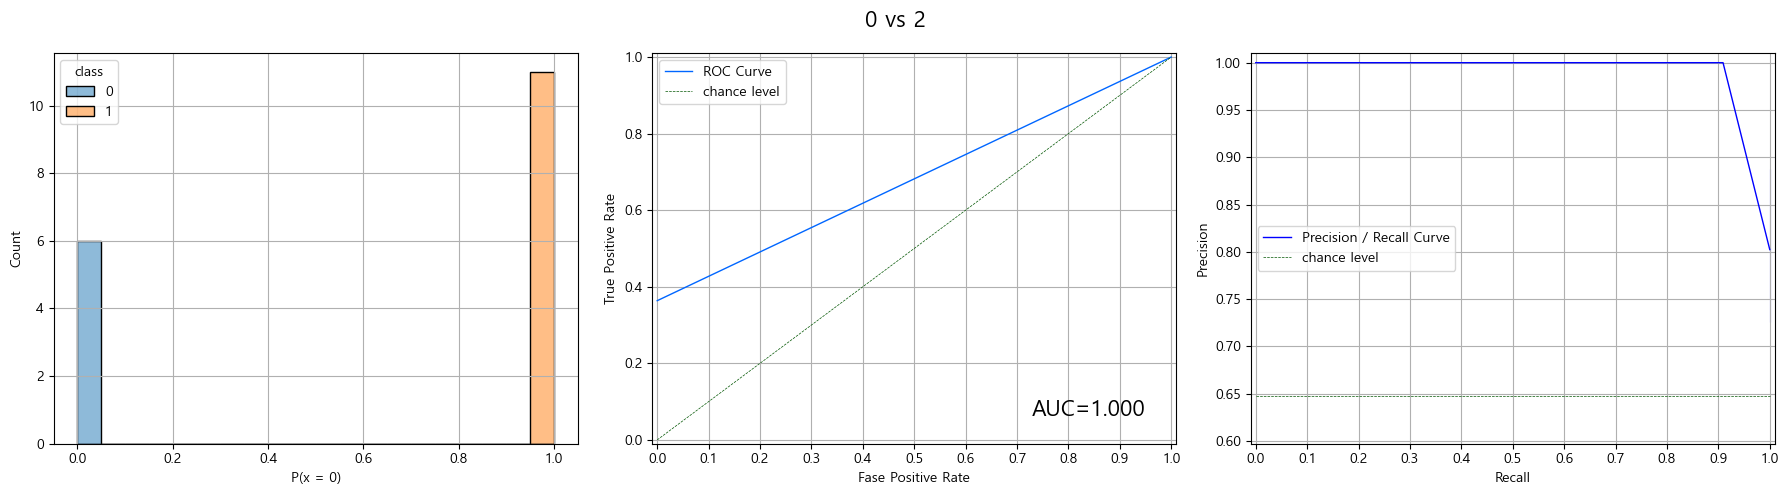

mean roc auc ovo: 1.0000


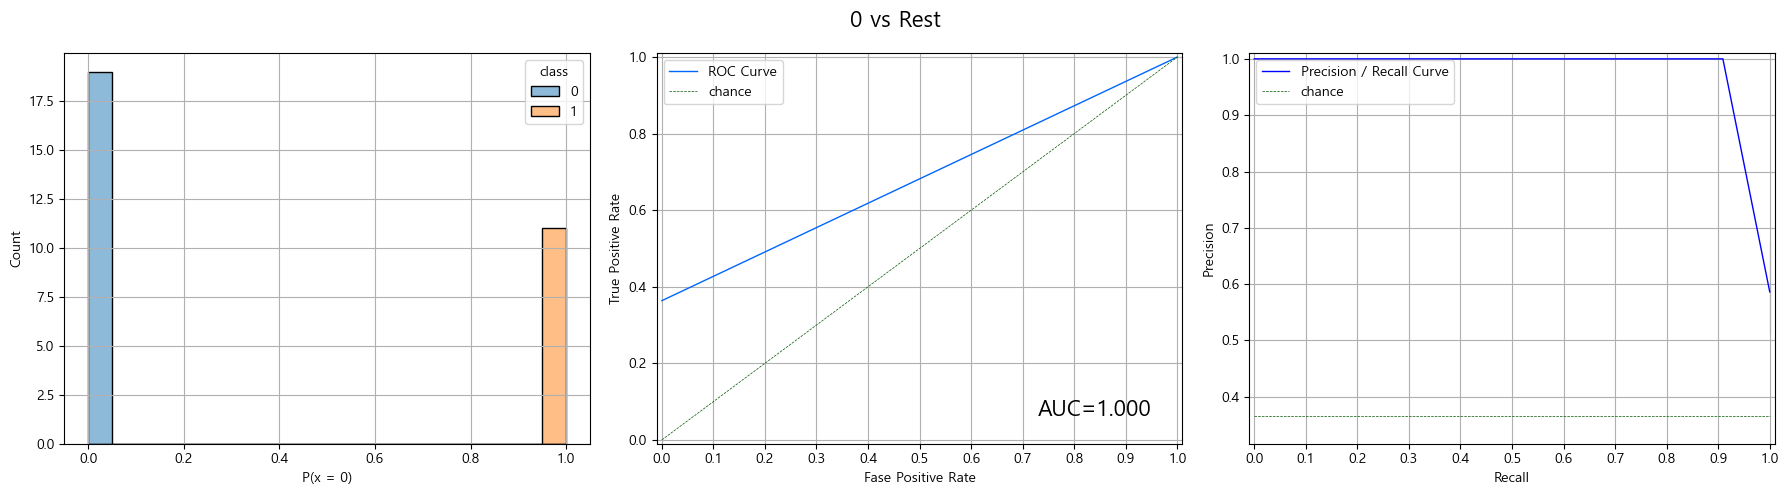

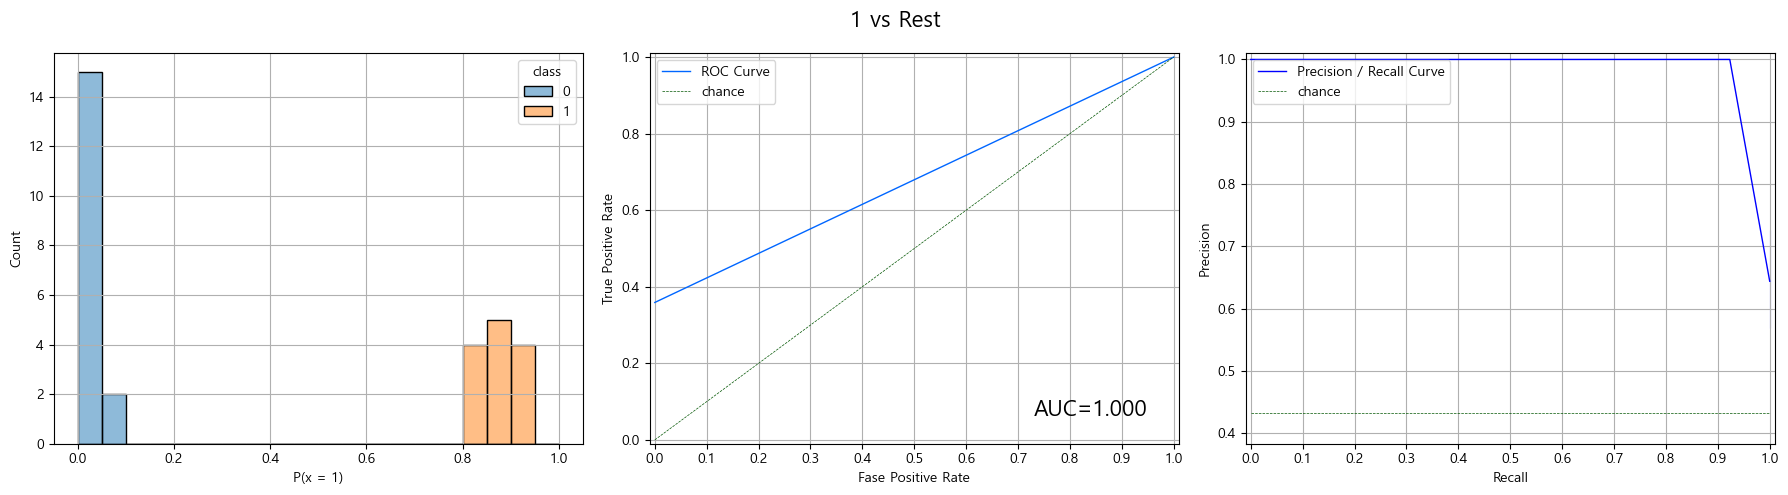

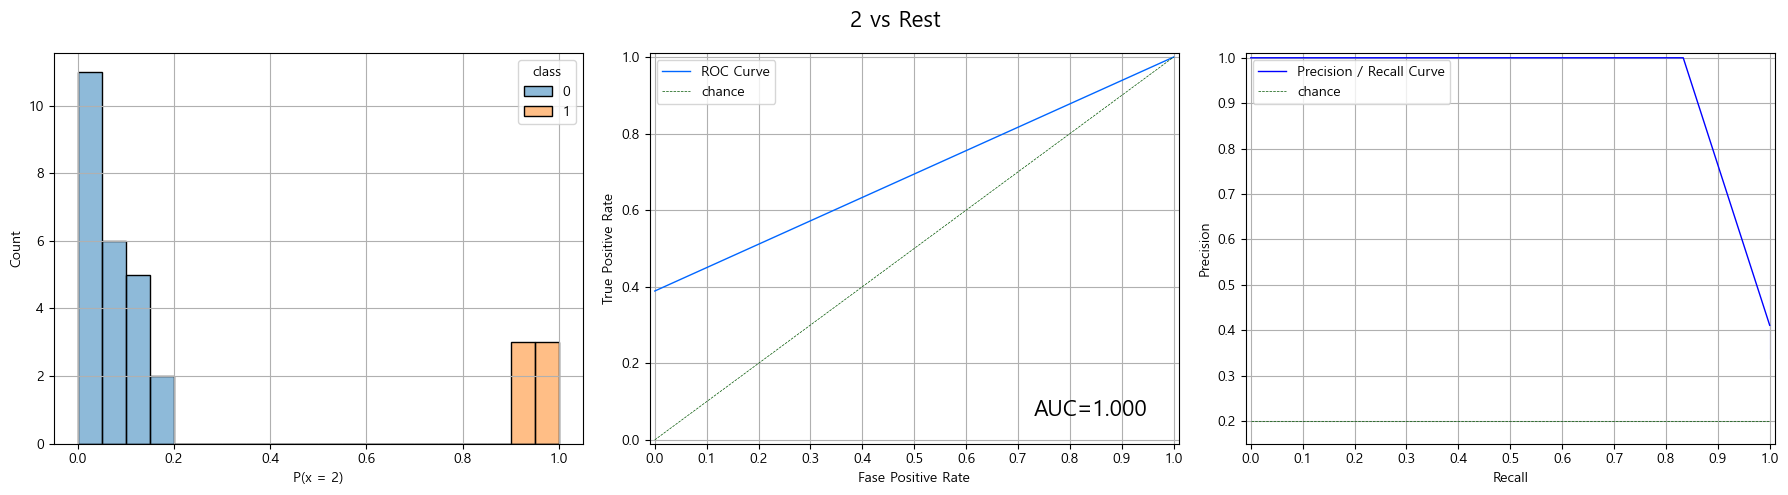

mean roc auc ovo: 1.0000

[학습곡선]


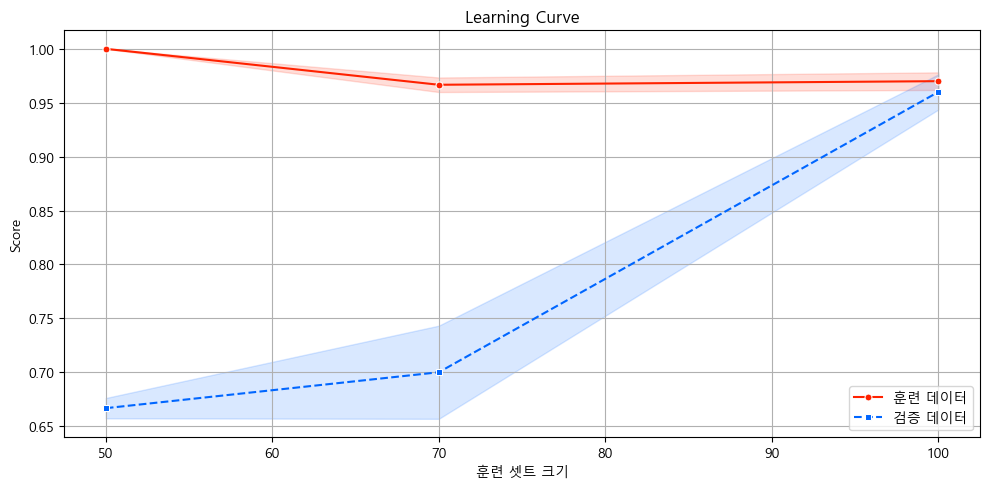

+----+------------+---------+--------------+---------+
|    | 종속변수   |   CLASS | 독립변수     |     VIF |
|----+------------+---------+--------------+---------|
|  0 | Species    |       0 | Sepal.Length | 5.12671 |
|  1 | Species    |       0 | Sepal.Width  | 2.33058 |
|  2 | Species    |       0 | Petal.Length | 21.9937 |
|  3 | Species    |       0 | Petal.Width  | 9.93846 |
+----+------------+---------+--------------+---------+
+----+------------+---------+--------------+---------+
|    | 종속변수   |   CLASS | 독립변수     |     VIF |
|----+------------+---------+--------------+---------|
|  0 | Species    |       1 | Sepal.Length | 5.12671 |
|  1 | Species    |       1 | Sepal.Width  | 2.33058 |
|  2 | Species    |       1 | Petal.Length | 21.9937 |
|  3 | Species    |       1 | Petal.Width  | 9.93846 |
+----+------------+---------+--------------+---------+
+----+------------+---------+--------------+---------+
|    | 종속변수   |   CLASS | 독립변수     |     VIF |
|----+------------+---------+-----

SVC(n_jobs=-1, probability=True, random_state=0)

In [4]:
my_svc_classification(x_train, y_train, x_test, y_test)

> 로지스틱 회귀의 경우 96.7%의 정확도와 95.2%의 정밀도를 보이고, KNN은 90%의 정확도와 87.1%의 정밀도를 보였다.
>
> SVM의 경우 93.3%의 정확도와, 91.4%의 정밀도를 보였다.
> 
> 그러므로 이 데이터셋은 로지스틱 회귀와 SVM에서 가장 좋은 성능을 보인다.

## #03. Wine 데이터 셋

### [1] 데이터 가져오기

In [5]:
origin = my_read_excel("https://data.hossam.kr/mldata/wine.xlsx", categories=['class'], info=False)


상위 5개 행
+----+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-------+--------------------------------+-----------+---------+
|    |   alcohol |   malic_acid |   ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   nonflavanoid_phenols |   proanthocyanins |   color_intensity |   hue |   od280/od315_of_diluted_wines |   proline |   class |
|----+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-------+--------------------------------+-----------+---------|
|  0 |     14.23 |         1.71 |  2.43 |                15.6 |         127 |             2.8 |         3.06 |                   0.28 |              2.29 |              5.64 |  1.04 |                           3.92 |      1065 |       0 |
|  1 |      13.2 |         1.78 |  

### [2] 데이터 전처리

1. 종속변수 타입 변환
2. 훈련/검증 데이터 분할 + 데이터 스케일링

In [6]:
df = origin.copy()
df['class'] = df['class'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### [3] SVM 분류 구현

[교차검증 TOP5]
+----+----------+-------------------+
|    | kernel   |   mean_test_score |
|----+----------+-------------------|
|  0 | rbf      |          0.985961 |
|  1 | sigmoid  |          0.979064 |
|  2 | poly     |          0.944089 |
+----+----------+-------------------+

[Best Params]
{'kernel': 'rbf'}

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.992958 |            1 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.992248 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.992958 |            1 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |      0.99302 |            1 | 정밀도와 재현율의 조화평균      

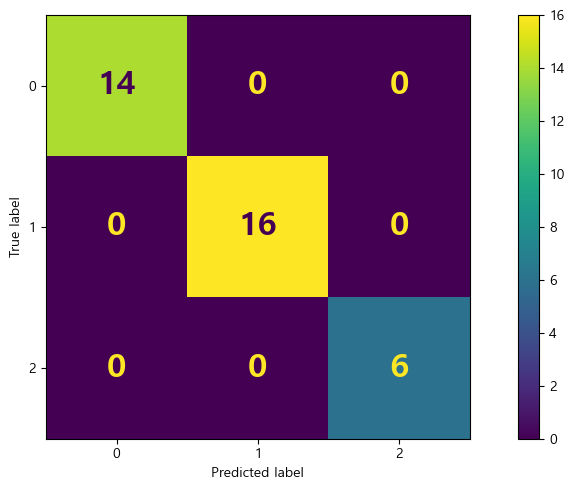


[Roc Curve]


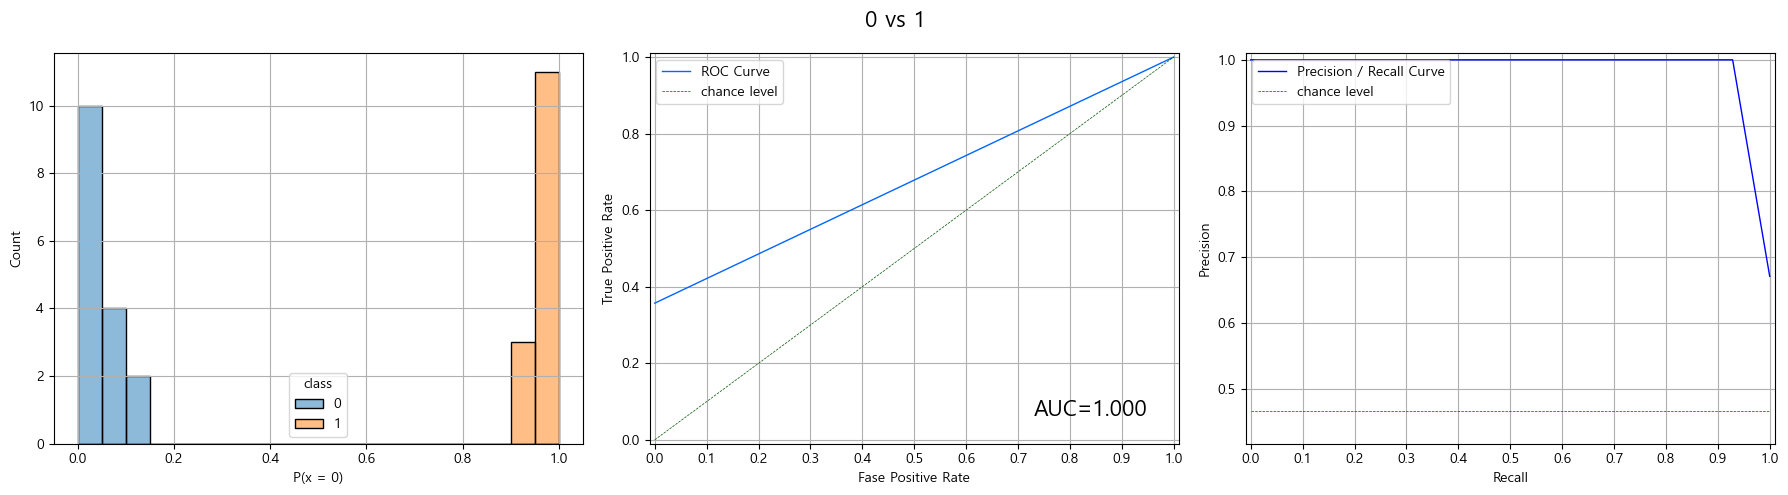

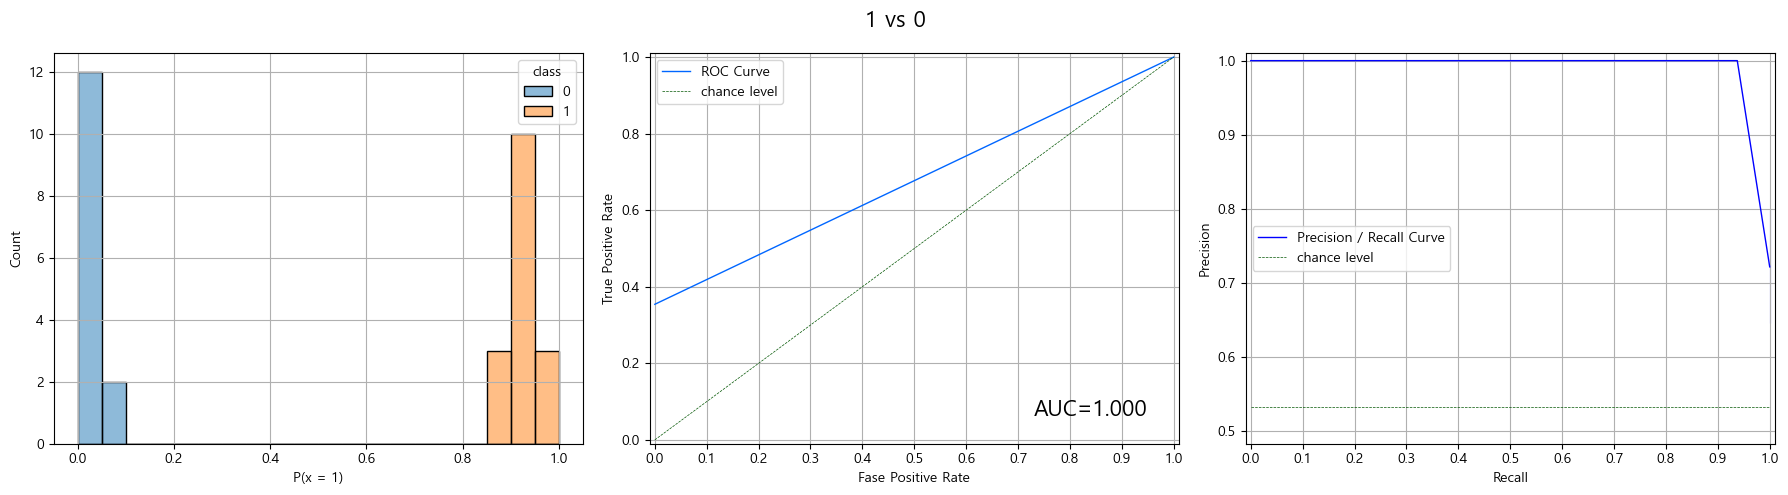

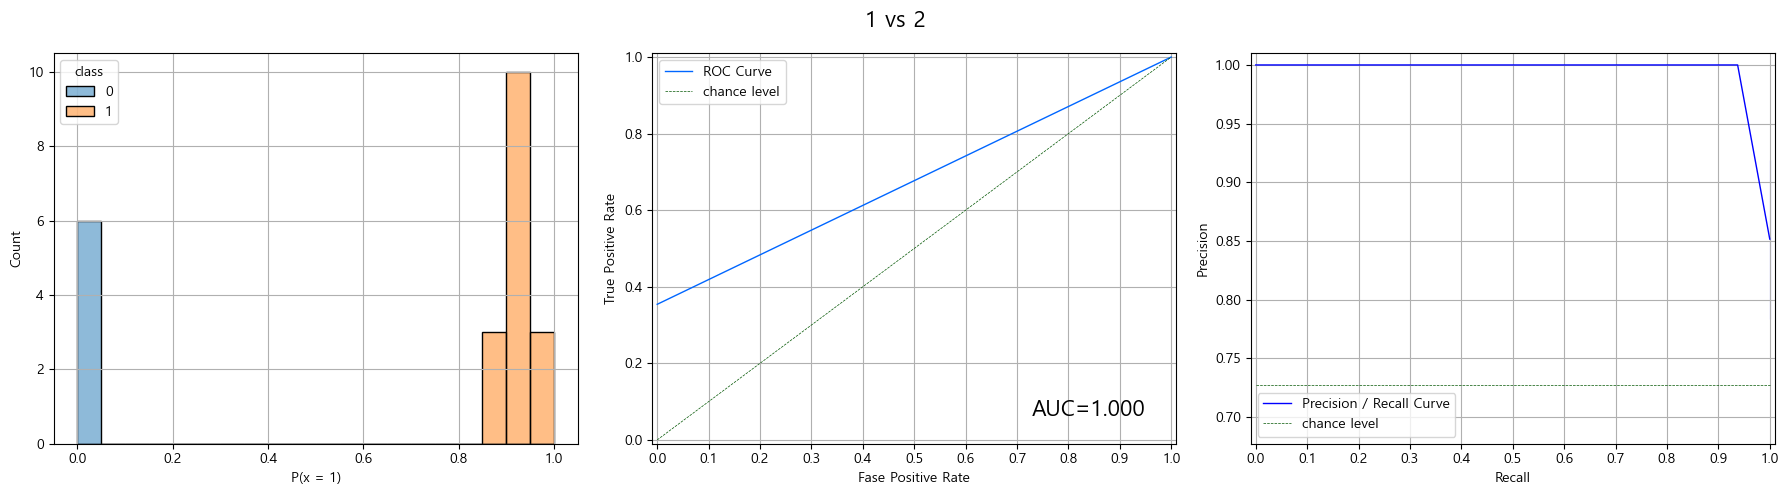

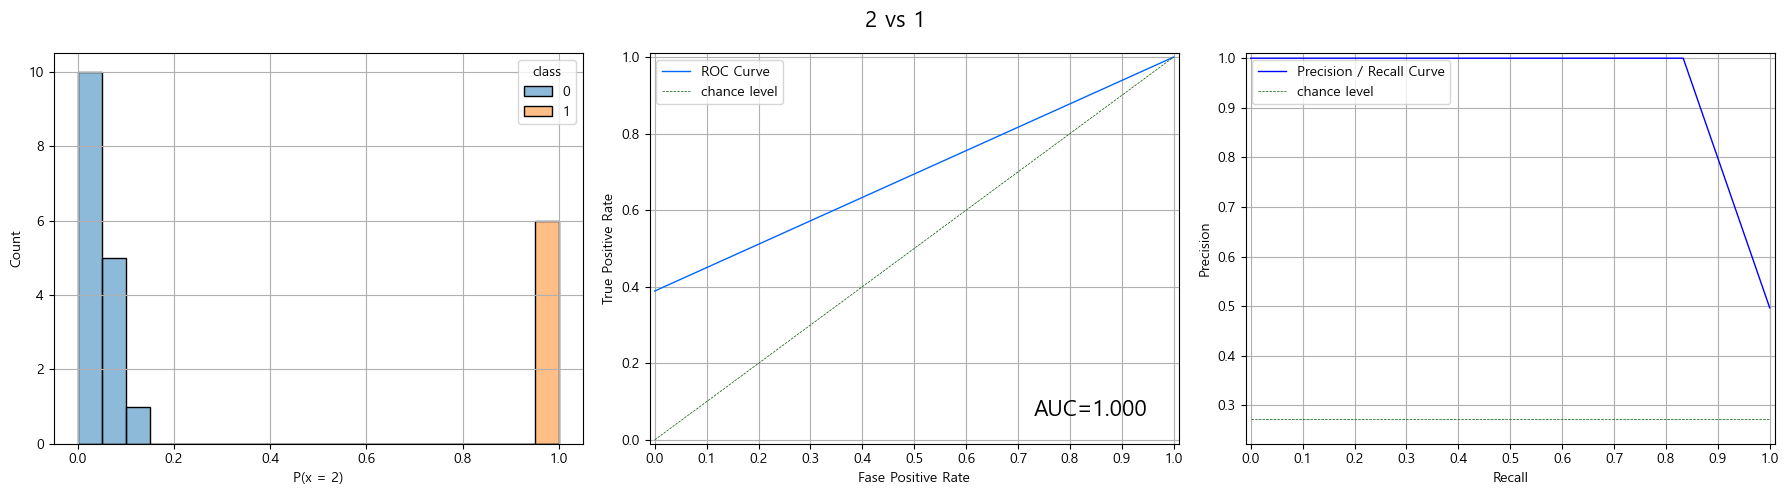

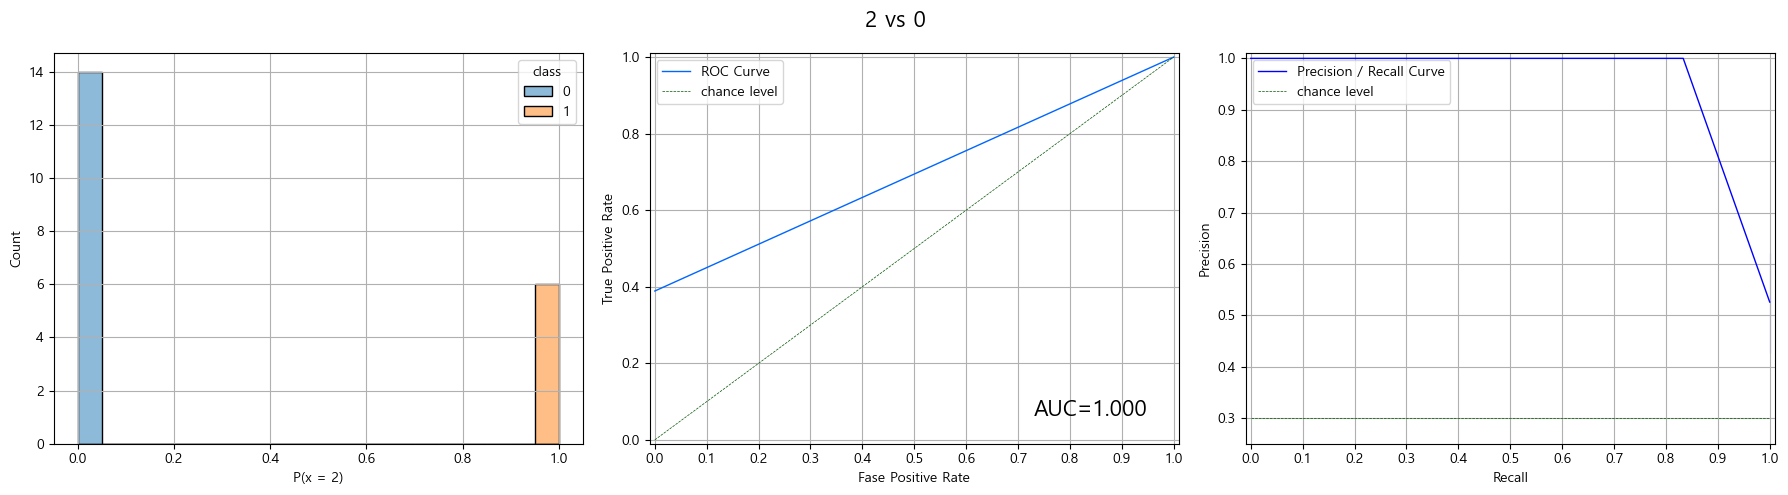

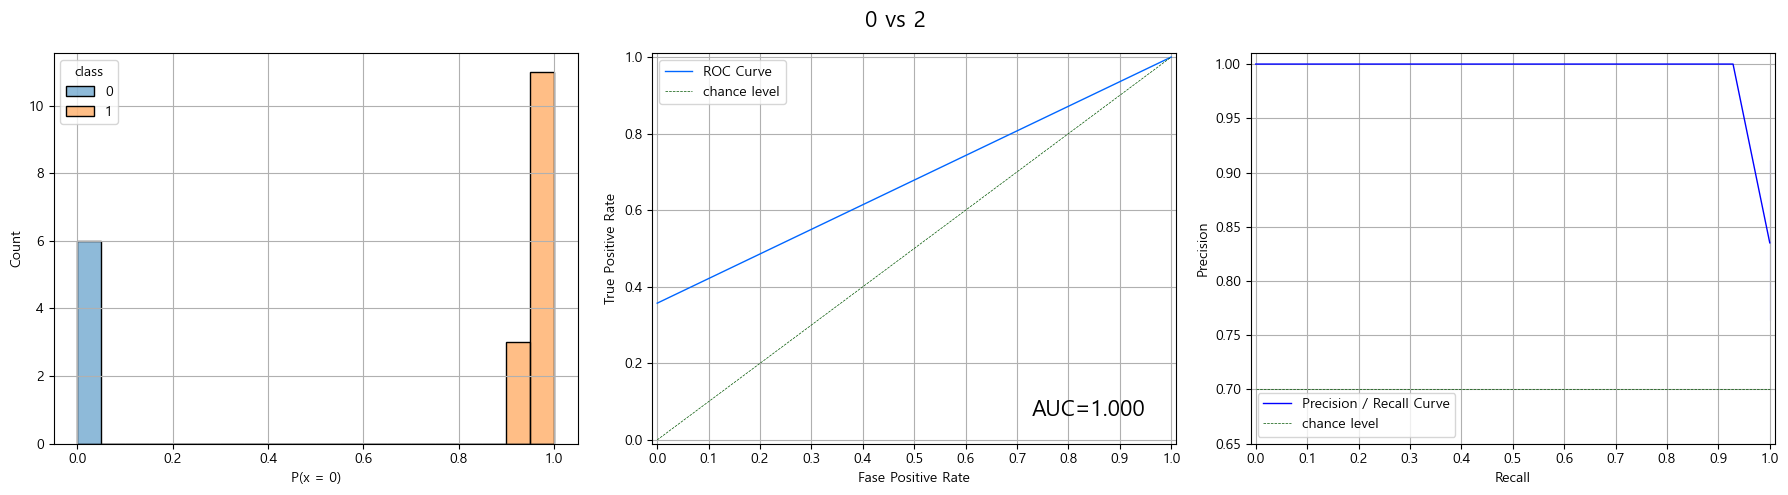

mean roc auc ovo: 1.0000


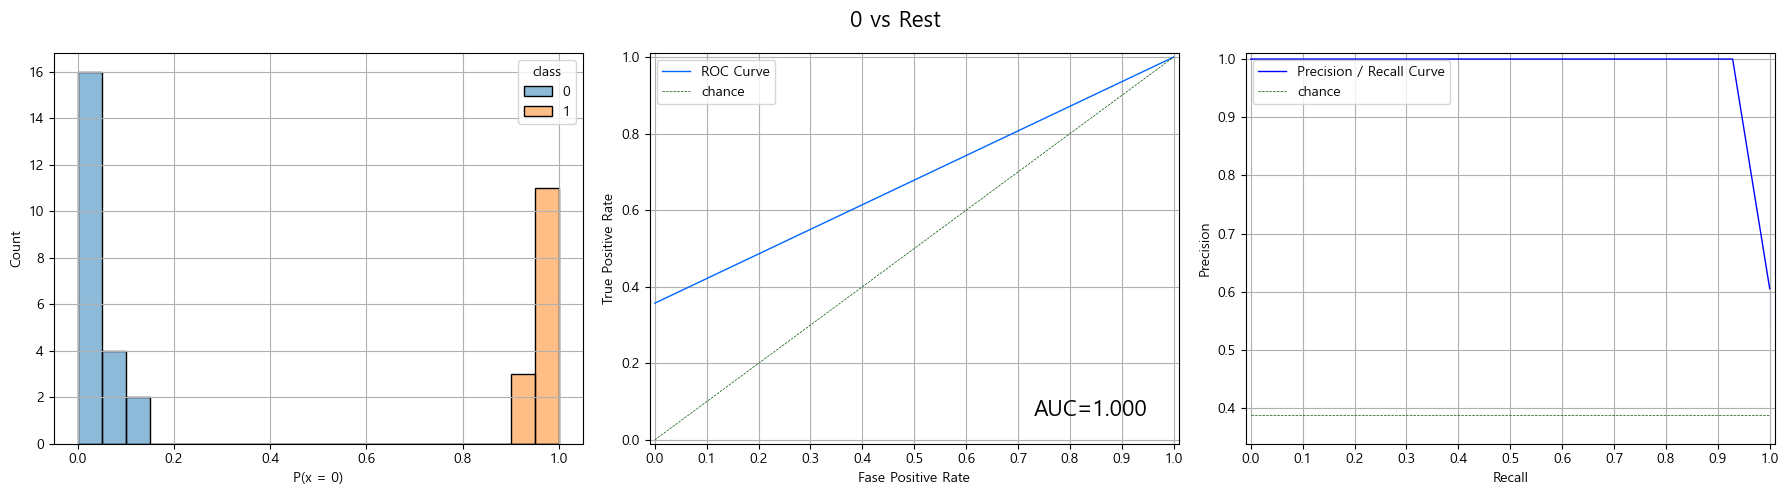

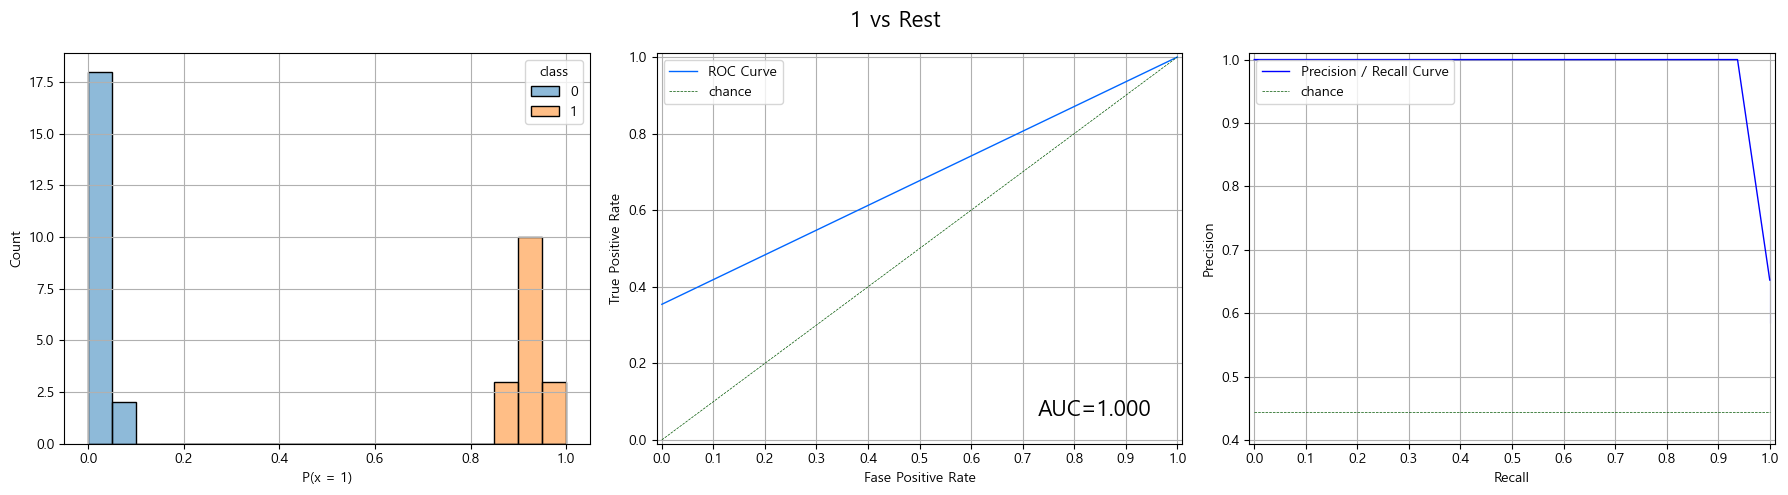

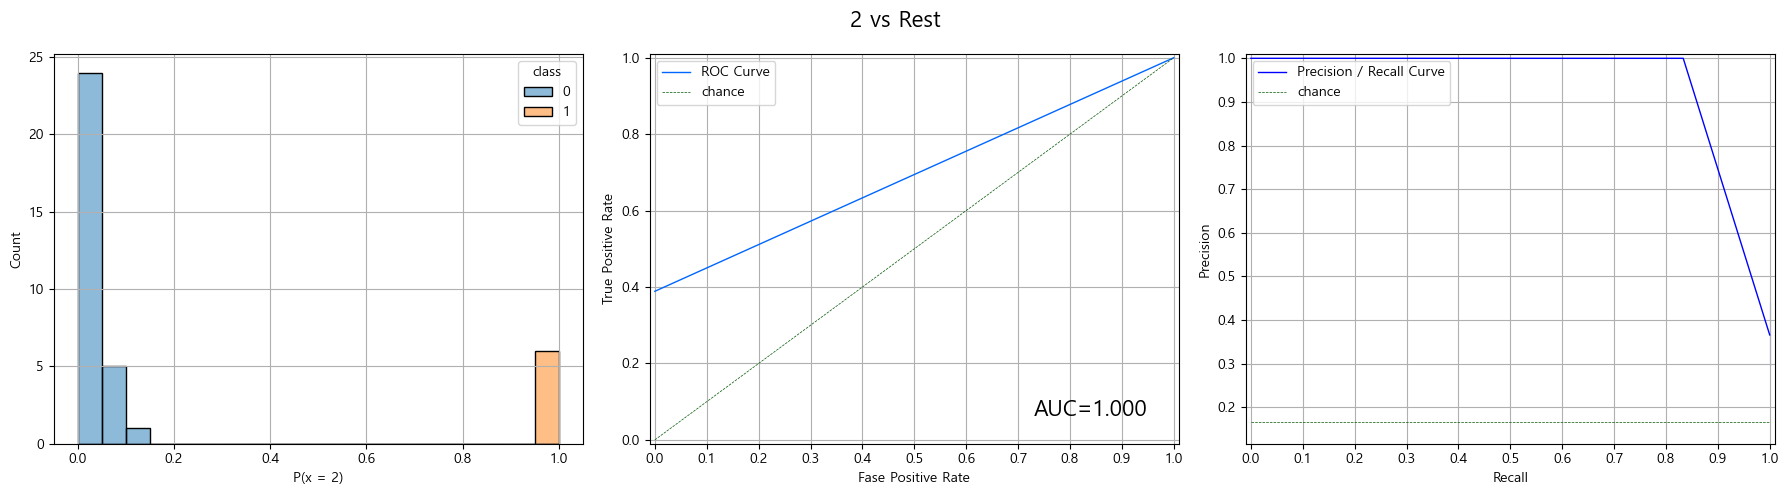

mean roc auc ovo: 1.0000

[학습곡선]


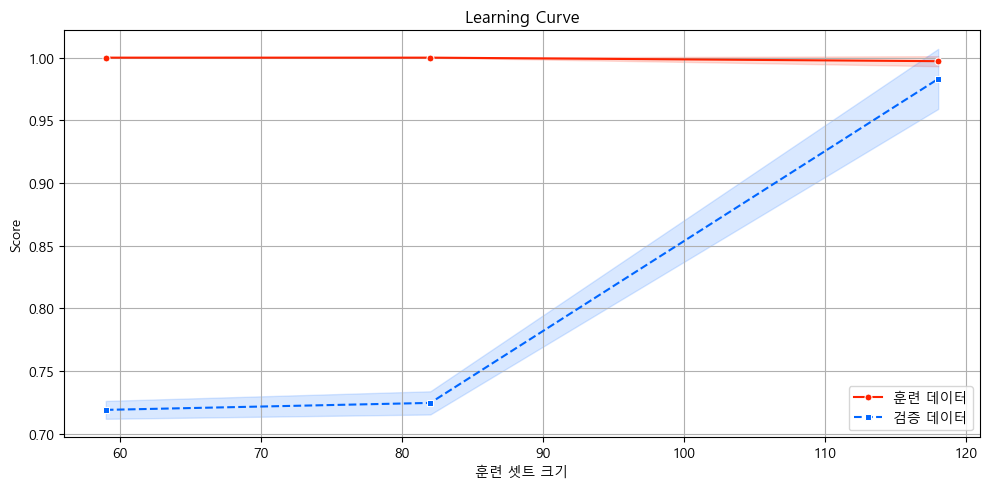

+----+------------+---------+------------------------------+---------+
|    | 종속변수   |   CLASS | 독립변수                     |     VIF |
|----+------------+---------+------------------------------+---------|
|  0 | class      |       0 | alcohol                      | 4.38801 |
|  1 | class      |       0 | malic_acid                   | 2.89409 |
|  2 | class      |       0 | ash                          |  4.6266 |
|  3 | class      |       0 | alcalinity_of_ash            | 4.16479 |
|  4 | class      |       0 | magnesium                    | 2.81053 |
|  5 | class      |       0 | total_phenols                | 6.76673 |
|  6 | class      |       0 | flavanoids                   | 9.41542 |
|  7 | class      |       0 | nonflavanoid_phenols         | 2.77809 |
|  8 | class      |       0 | proanthocyanins              | 2.20772 |
|  9 | class      |       0 | color_intensity              | 3.90171 |
| 10 | class      |       0 | hue                          | 3.39061 |
| 11 | class  

SVC(n_jobs=-1, probability=True, random_state=0)

In [7]:
my_svc_classification(x_train, y_train, x_test, y_test)

> 로지스틱과 KNN 모두 정확도와 정밀도가 `100%`를 보였으나 SVM의 경우 정확도와 정밀도가 각각 97.2%를 보였다.
>
> 하이퍼파라미터 조합에 대한 경우의 수를 축소하더라도 성능의 변화가 없었다.
>
> 이 데이터셋에 SVM은 적합하지 않은 모형으로 판단할 수 있다.